In [ ]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio

# Keras modules
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [ ]:
class GAN():
    def __init__(self, image_shape, generator_input_dim):
        optimizer = Adam(0.0002, 0.5)
        self.img_shape = image_shape
        self.generator_input_dim = generator_input_dim

        # Build models
        self._build_generator_model()
        self._build_and_compile_discriminator_model(optimizer)
        self._build_and_compile_gan(optimizer)
    
    def train(self, epochs, train_data, batch_size):
        
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        history = []
        for epoch in range(epochs):
            #  Train Discriminator
            batch_indexes = np.random.randint(0, train_data.shape[0], batch_size)
            batch = train_data[batch_indexes]
            genenerated = self._predict_noise(batch_size)
            loss_real = self.discriminator_model.train_on_batch(batch, real)
            loss_fake = self.discriminator_model.train_on_batch(genenerated, fake)
            discriminator_loss = 0.5 * np.add(loss_real, loss_fake)

            #  Train Generator
            noise = np.random.normal(0, 1, (batch_size, self.generator_input_dim))
            generator_loss = self.gan.train_on_batch(noise, real)

            # Plot the progress
            print ("———————————————————")
            print ("******************Epoch {}***************************".format(epoch))
            print ("Discriminator loss: {}".format(discriminator_loss[0]))
            print ("Generator loss: {}".format(generator_loss))
            print ("———————————————————")
            
            history.append({"D":discriminator_loss[0],"G":generator_loss})
        print(history)                
        self._plot_loss(history)     
    
    def _build_generator_model(self):
        _alpha = 0.5
        generator_input = Input(shape=(self.generator_input_dim,))
        generator_seqence = Sequential(
                [Dense(200, input_dim=self.generator_input_dim),
                 LeakyReLU(alpha=_alpha),
                 BatchNormalization(momentum=0.8),
                 Dense(100),
                 LeakyReLU(alpha=_alpha),
                 BatchNormalization(momentum=0.8),
                 Dense(50),
                 LeakyReLU(alpha=_alpha),
                 BatchNormalization(momentum=0.8),
                 Dense(25),
                 LeakyReLU(alpha=_alpha),
                 BatchNormalization(momentum=0.8),
                 Dense(4),
                 LeakyReLU(alpha=_alpha),
                 BatchNormalization(momentum=0.8),
                 Dense(np.prod(self.img_shape), activation='tanh'),
                 Reshape(self.img_shape)])
    
        generator_output_tensor = generator_seqence(generator_input)       
        self.generator_model = Model(generator_input, generator_output_tensor)
        
    def _build_and_compile_discriminator_model(self, optimizer):
        _alpha = 0.5
        discriminator_input = Input(shape=self.img_shape)
        discriminator_sequence = Sequential(
                [Flatten(input_shape=self.img_shape),
                 Dense(100),
                 LeakyReLU(alpha= _alpha),
                 Dense(50),
                 LeakyReLU(alpha= _alpha),
                 Dense(10),
                 LeakyReLU(alpha= _alpha),
                 Dense(1, activation='sigmoid')])
    
        discriminator_tensor = discriminator_sequence(discriminator_input)
        self.discriminator_model = Model(discriminator_input, discriminator_tensor)
        self.discriminator_model.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.discriminator_model.trainable = False
    
    def _build_and_compile_gan(self, optimizer):
        real_input = Input(shape=(self.generator_input_dim,))
        generator_output = self.generator_model(real_input)
        discriminator_output = self.discriminator_model(generator_output)        
        
        self.gan = Model(real_input, discriminator_output)
        self.gan.compile(loss='binary_crossentropy', optimizer=optimizer)
        
    def _predict_noise(self, size):
        noise = np.random.normal(0, 1, (size, self.generator_input_dim))
        return self.generator_model.predict(noise)
        
    def _plot_loss(self, history):
        hist = pd.DataFrame(history)
        plt.figure(figsize=(20,5))
        for colnm in hist.columns:
            plt.plot(hist[colnm],label=colnm)
        plt.legend()
        plt.ylabel("loss")
        plt.xlabel("epochs")
        plt.show()

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Roncalli_1.xlsx to Roncalli_1.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(data_to_load['Roncalli_1.xlsx']))

In [ ]:
X_train=df[['data1.xslx','data2.xslx','data3.xslx','data4.xslx']].to_numpy()
X_train = np.expand_dims(X_train, axis=2)

4/4 [==============================] - 1s 5ms/step
———————————————————
******************Epoch 0***************************
Discriminator loss: 0.7066535651683807
Generator loss: 0.6794994473457336
———————————————————
4/4 [==============================] - 0s 5ms/step
———————————————————
******************Epoch 1***************************
Discriminator loss: 0.6791368126869202
Generator loss: 0.6781808137893677
———————————————————
4/4 [==============================] - 0s 3ms/step
———————————————————
******************Epoch 2***************************
Discriminator loss: 0.6697797775268555
Generator loss: 0.6814231872558594
———————————————————
4/4 [==============================] - 0s 3ms/step
———————————————————
******************Epoch 3***************************
Discriminator loss: 0.6753918826580048
Generator loss: 0.6760056018829346
———————————————————
4/4 [==============================] - 0s 4ms/step
———————————————————
******************Epoch 4***************************
Disc

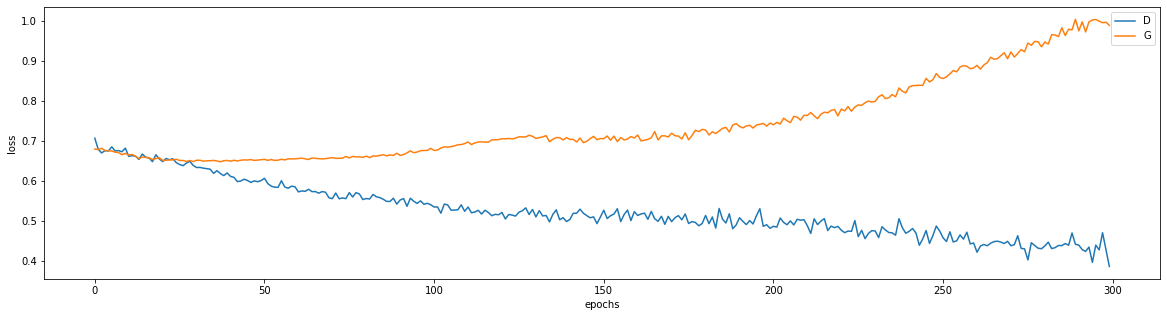

In [ ]:
generative_advarsial_network = GAN(X_train[0].shape, 100)
generative_advarsial_network.train(300, X_train, batch_size=128)